In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("lsdata1.csv",header = None, index_col = False,)
lsdata1 = train_df.to_numpy()

test_df = pd.read_csv("lsdata2.csv",header = None, index_col = False,)
lsdata2 = test_df.to_numpy()

# with open('lsdata1.csv','r') as f:
#     data = list(csv.reader(f,delimiter=',',quoting = csv.QUOTE_NONNUMERIC))
# data = np.array(data)

## Part A Linear Regression

The Parameter w is 0.73088


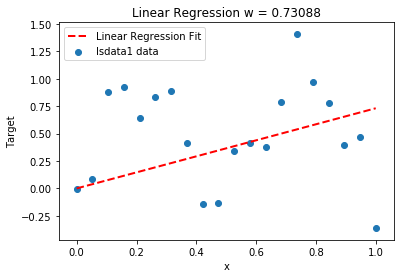

In [21]:
# Linear Regression

N_train = lsdata1.shape[0]

x_train = lsdata1[:,0].reshape(N_train,1)
y_train = lsdata1[:,1].reshape(N_train,1)

w = np.matmul(np.linalg.inv(np.matmul(x_train.transpose(),x_train)),np.matmul(x_train.transpose(),y_train))

print("The Parameter w is {:.5}".format(w[0][0]))

x_points = 100
x_fit = np.linspace(0,1,x_points)
y_fit = w[0]*x_fit

# Plot data and w parameter
plt.scatter(x_train,y_train, label = 'lsdata1 data')
plt.plot(x_fit,y_fit, linestyle = '--', color = 'red',linewidth = 2, label = 'Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('Target')
plt.title('Linear Regression w = {:.5f}'.format(w[0][0]))
plt.legend(loc=0)

plt.show()
